In [1]:
  #conda install datasets matplotlib pandas, conda activate python_course 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x)
  

c:\Users\seane\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#SEABORN INTRODUCTION: import seaborn as sns
#Coinda install seaborn

import seaborn as sns


In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop Nan values

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

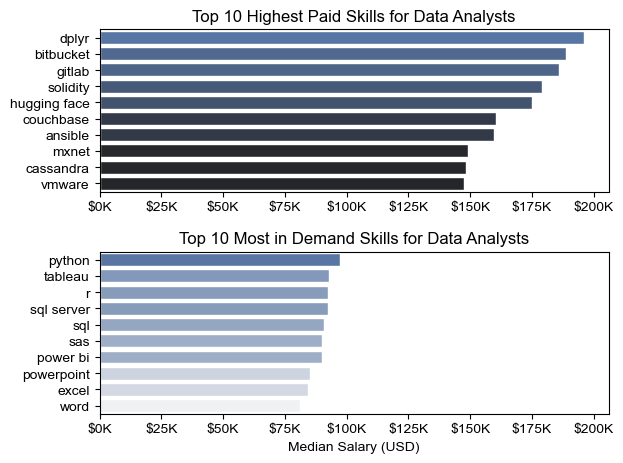

In [16]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

#Skills with highest median salary 
df_DA_top_pay = df_DA_US_group.sort_values(by = 'median', ascending = False).head(10)

df_DA_top_pay 

#Skills with highest count

df_DA_top_skills = df_DA_US_group.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False).head(10)


#Now we have the two dataframes, we need to plot them

fig, ax = plt.subplots(2, 1)

sns.set_theme(style = 'ticks')

sns.barplot(data = df_DA_top_pay, x = 'median', y = df_DA_top_pay.index, ax=ax[0], hue = 'median', palette = 'dark:b')
ax[0].legend().remove()

#df_DA_top_pay.plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)

#ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, poss: f'${int(x/1000)}K'))


sns.barplot(data = df_DA_top_skills, x = 'median', y = df_DA_top_skills.index, ax=ax[1], hue = 'median', palette = 'light:b') #seaborn allows you to change colours base on variable - median
#df_DA_top_skills.plot(kind = 'barh', y = 'median', ax = ax[1],legend = False)
ax[1].legend().remove()

#ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim()) # or ax[1].set_xlim(0, 200000) 
ax[1].set_title('Top 10 Most in Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, poss: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()

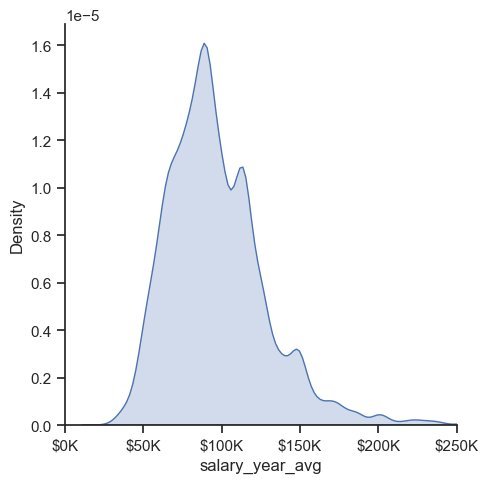

In [20]:
#2. Histograms with Seaborne

sns.displot(df_DA_US['salary_year_avg'], kind = 'kde', fill = True)


#df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black')

plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, poss: f'${int(x/1000)}K'))


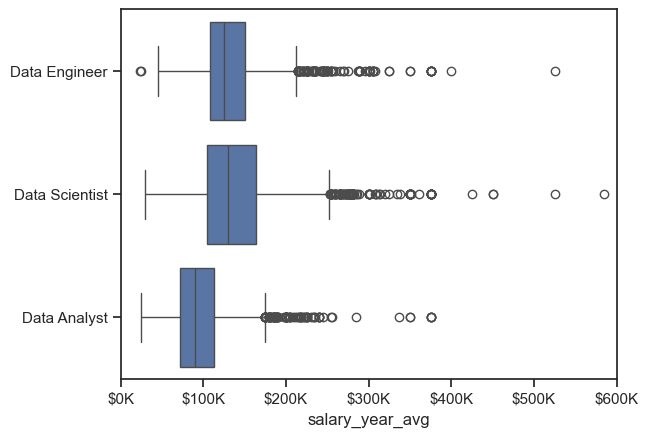

In [23]:
#Boxplots with Seaborne

#Compare plots with different jobs
job_titles =  ['Data Analyst', 'Data Engineer', 'Data Scientist']


df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = 'salary_year_avg')

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


sns.boxplot(data = df_US, x = 'salary_year_avg', y = 'job_title_short')
# plt.boxplot(job_list, labels = job_titles, vert = False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, poss: f'${int(x/1000)}K'))
plt.ylabel('')
plt.xlim(0, 600000)
plt.show()